/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


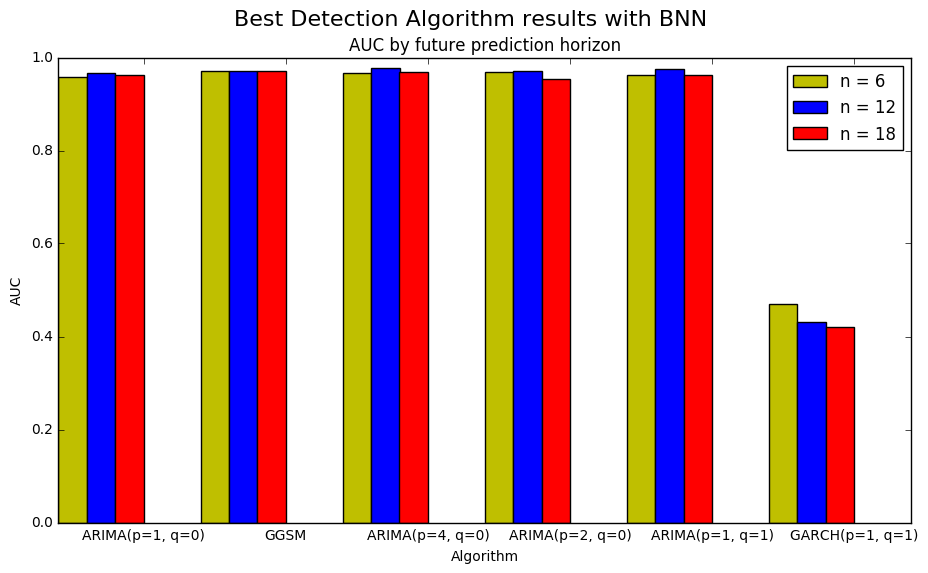

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 6
algorithms = ('ARIMA(p=1, q=0)','GGSM','ARIMA(p=4, q=0)','ARIMA(p=2, q=0)','ARIMA(p=1, q=1)','GARCH(p=1, q=1)')
future_6 = (0.958473342708,0.970968586947,0.967312261302,0.969449440448,0.962510354111,0.470926036948)
future_12 = (0.966687770391,0.970138762003,0.976973198269,0.970096021948,0.974752031234,0.430384087791)
future_18 = (0.961395351185,0.970044048589,0.968852235551,0.954684177888,0.96206934852,0.420955511127)

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure(figsize=(11, 6))
fig.suptitle('Best Detection Algorithm results with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_ylabel('AUC')
ax.set_xlabel('Algorithm')
ax.set_title('AUC by future prediction horizon')

rects1 = ax.bar(ind, future_6, width, color='y')
rects2 = ax.bar(ind + width, future_12, width, color='b')
rects3 = ax.bar(ind + 2*width, future_18, width, color='r')


ax.set_xticks(ind + 3*width)
ax.set_xticklabels(algorithms)

ax.legend((rects1[0], rects2[0], rects3[0]), ('n = 6', 'n = 12', 'n = 18'))
plt.legend(loc='upper left')

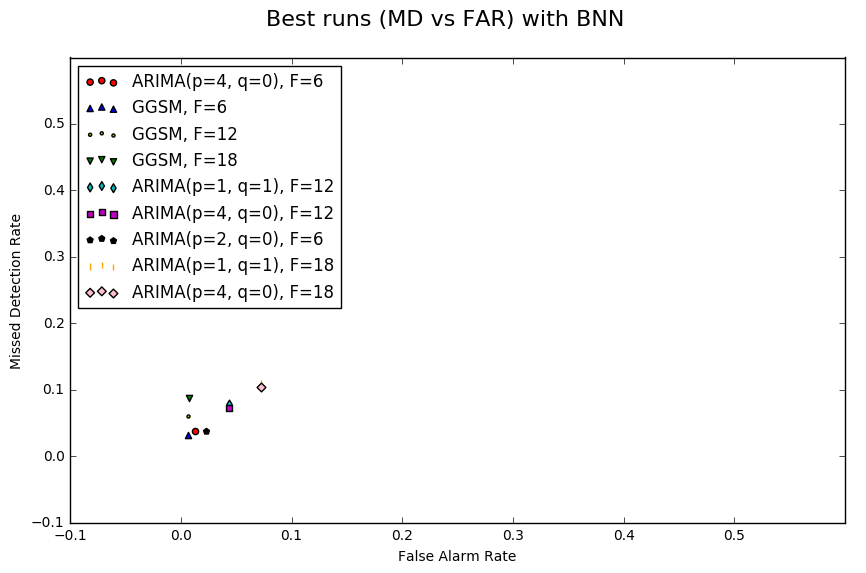

In [2]:
r = [
 'Model=GGSM, Past Prediction Horizon=64, Future Prediction Horizon=6, Threshold=3.225, FA=0.00638977635783, MD=0.0310880829016',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.425, FA=0.0127795527157, MD=0.0372670807453',
 'Model=ARIMA(p=2, q=0), Past Prediction Horizon=96, Future Prediction Horizon=6, Threshold=3.275, FA=0.0223642172524, MD=0.0372670807453',
 'Model=GGSM, Past Prediction Horizon=64, Future Prediction Horizon=12, Threshold=3.075, FA=0.00664451827243, MD=0.0603015075377',
 'Model=GGSM, Past Prediction Horizon=64, Future Prediction Horizon=18, Threshold=2.925, FA=0.00692041522491, MD=0.0878048780488',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.475, FA=0.0431893687708, MD=0.0718562874251',
 'Model=ARIMA(p=1, q=1), Past Prediction Horizon=96, Future Prediction Horizon=12, Threshold=3.275, FA=0.0431893687708, MD=0.0778443113772',
 'Model=ARIMA(p=4, q=0), Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.325, FA=0.0726643598616, MD=0.104046242775',
 'Model=ARIMA(p=1, q=1), Past Prediction Horizon=96, Future Prediction Horizon=18, Threshold=3.225, FA=0.0726643598616, MD=0.109826589595'
]
algorithm_results = dict()

for line in r:           
    toks = line.split(', ')

    if len(toks) == 6:
        algorithm = toks[0].replace('Model=', '')+ ', F=' + toks[2].split('=')[1]
    else:
        algorithm = toks[0].replace('Model=', '') + ', ' + toks[1] + ', F=' + toks[3].split('=')[1]
        
    if algorithm not in algorithm_results:
        algorithm_results[algorithm] = []
        
    if len(toks) == 6:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[4:]))
    else:
        algorithm_results[algorithm].append(map(lambda t: float(t.split('=')[1]), toks[5:]))

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Best runs (MD vs FAR) with BNN', fontsize=16)
ax = fig.add_subplot(111)
ax.set_xlabel('False Alarm Rate')
ax.set_ylabel('Missed Detection Rate')
plt.xlim([-0.1, 0.6])
plt.ylim([-0.1, 0.6])

colors_and_markers = [('r', 'o'), ('b', '^'), ('y', '.'), ('g', 'v'),
                      ('c', 'd'), ('m', 's'), ('k', 'p'), ('#FFA500', '|'), ('#FFC0CB', 'D')]
count = 0
print 
for algorithm, algorithm_result in algorithm_results.iteritems():
    x = [r[0] for r in algorithm_result]
    y = [r[1] for r in algorithm_result]
    
    c, m = colors_and_markers[count]
    count += 1
    ax.scatter(x, y, c=c, marker=m, label=algorithm)
    
plt.legend(loc='upper left')